In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import yfinance as yf
import investpy as inv
from datetime import datetime, timedelta
import pandas as pd
from scipy.stats import linregress
from dateutil.relativedelta import relativedelta

## Extraindo preços recentes

In [2]:
def hist_value(ticker='BBDC4.SA', dt_start = datetime.strptime('2022-08-13', '%Y-%m-%d').date()):
    try:
        # Criar um objeto Ticker com yfinance
        stock = yf.Ticker(ticker)

        # Obter todo o histórico de preços
        historical_data = stock.history(start = dt_start)

        # Verificar se os dados foram retornados corretamente
        if historical_data.empty:
            raise ValueError(f"No data found for ticker {ticker}. It may be delisted or invalid.")

        # Resetar o índice para que a data seja uma coluna separada
        historical_data.reset_index(inplace=True)

        # Definir uma função para calcular o valor de abertura do dia
        def first_value(df):
            return df.iloc[0]

        # Agrupar os dados por data, calculando os resumos diários conforme especificado
        daily_summary = historical_data.groupby(historical_data['Date'].dt.to_period('D')).agg({
            'Open': first_value,
            'High': 'max',
            'Low': 'min',
            'Close': 'last',
            'Volume': 'sum'
        }).reset_index()

        # Calcular o valor médio da ação no dia (média entre Open e Close)
        daily_summary['Average'] = (daily_summary['Open'] + daily_summary['Close']) / 2

        # Obter os dividendos pagos pela ação
        dividends = stock.dividends

        # Agrupar e somar os dividendos pagos por dia
        dividends_daily = dividends.groupby(dividends.index.to_period('D')).sum().reset_index()

        # Juntar os dados de resumo diário com os dividendos pagos diariamente
        daily_summary = pd.merge(daily_summary, dividends_daily, left_on='Date', right_on='Date', how='left')
        
        # Adicionar a coluna 'Papel' com o nome do ticker
        daily_summary['Papel'] = ticker[:6]

        # Remover pontos, se existirem, na coluna 'Papel'
        daily_summary['Papel'] = daily_summary['Papel'].str.replace('.', '', regex=True)
    
    except ValueError as ve:
        print(ve)
        return pd.DataFrame()  # Retorna um DataFrame vazio em caso de erro
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return pd.DataFrame()  # Retorna um DataFrame vazio em caso de erro
    
    return daily_summary

In [3]:
#adicionar tempo %%time na célula abaixo

In [3]:
%%time
#pegar mais recentes
dates = pd.read_csv('preço_diário_histórico.csv')
#A data mais recente de cada ativo
dates['Date'] = pd.to_datetime(dates['Date'])  # Certifique-se de que a coluna 'Date' está no formato de data

# Agrupa pelo 'Papel' e encontra o índice da data mais recente para cada grupo
most_recent = dates.loc[dates.groupby('Papel')['Date'].idxmax()]
names = most_recent['Papel']

# Exemplo de uso com ticker inválido
spine = pd.DataFrame()

# Loop para processar os demais tickers
for k in range(len(names)):
    dt_start = pd.Timestamp(most_recent.Date.iloc[k] + timedelta(days=1)).date()
    temp = hist_value(f'{names.iloc[k]}.SA', dt_start = dt_start)
    if not temp.empty:
        spine = pd.concat([spine, temp])

# Opcional: Reseta o índice do DataFrame final após a concatenação
spine.reset_index(drop=True, inplace=True)

C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


ADHM3.SA: No data found for this date range, symbol may be delisted
No data found for ticker ADHM3.SA. It may be delisted or invalid.
AELP3.SA: No data found for this date range, symbol may be delisted
No data found for ticker AELP3.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


AUTM3.SA: No data found for this date range, symbol may be delisted
No data found for ticker AUTM3.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


BHGR3.SA: No data found for this date range, symbol may be delisted
No data found for ticker BHGR3.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


BPHA3.SA: No data found for this date range, symbol may be delisted
No data found for ticker BPHA3.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


BRPR3.SA: No data found for this date range, symbol may be delisted
No data found for ticker BRPR3.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


BUET3.SA: No data found for this date range, symbol may be delisted
No data found for ticker BUET3.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


CBMA4.SA: No data found for this date range, symbol may be delisted
No data found for ticker CBMA4.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


CORR3.SA: No data found for this date range, symbol may be delisted
No data found for ticker CORR3.SA. It may be delisted or invalid.
CORR4.SA: No data found for this date range, symbol may be delisted
No data found for ticker CORR4.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


CZRS4.SA: No data found for this date range, symbol may be delisted
No data found for ticker CZRS4.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


ECPR3.SA: No data found for this date range, symbol may be delisted
No data found for ticker ECPR3.SA. It may be delisted or invalid.
ECPR4.SA: No data found for this date range, symbol may be delisted
No data found for ticker ECPR4.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


FBMC3.SA: No data found for this date range, symbol may be delisted
No data found for ticker FBMC3.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


FTRX4.SA: No data found for this date range, symbol may be delisted
No data found for ticker FTRX4.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


IGUA3.SA: No data found for this date range, symbol may be delisted
No data found for ticker IGUA3.SA. It may be delisted or invalid.
IGUA5.SA: No data found for this date range, symbol may be delisted
No data found for ticker IGUA5.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


KROT11.SA: No data found for this date range, symbol may be delisted
No data found for ticker KROT11.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


MTIG3.SA: No data found for this date range, symbol may be delisted
No data found for ticker MTIG3.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


PRTX3.SA: No data found for this date range, symbol may be delisted
No data found for ticker PRTX3.SA. It may be delisted or invalid.
PRVI3.SA: No data found for this date range, symbol may be delisted
No data found for ticker PRVI3.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


RDCD3.SA: No data found for this date range, symbol may be delisted
No data found for ticker RDCD3.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


REEM4.SA: No data found for this date range, symbol may be delisted
No data found for ticker REEM4.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


SCLO3.SA: No data found for this date range, symbol may be delisted
No data found for ticker SCLO3.SA. It may be delisted or invalid.
SCLO4.SA: No data found for this date range, symbol may be delisted
No data found for ticker SCLO4.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


SLED3.SA: No data found for this date range, symbol may be delisted
No data found for ticker SLED3.SA. It may be delisted or invalid.
SLED4.SA: No data found for this date range, symbol may be delisted
No data found for ticker SLED4.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


SULT3.SA: No data found for this date range, symbol may be delisted
No data found for ticker SULT3.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


TENE5.SA: No data found for this date range, symbol may be delisted
No data found for ticker TENE5.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


TNCP4.SA: No data found for this date range, symbol may be delisted
No data found for ticker TNCP4.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


VVAR4.SA: No data found for this date range, symbol may be delisted
No data found for ticker VVAR4.SA. It may be delisted or invalid.


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


Wall time: 3min 54s


C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


### Atualiza preço

In [4]:
hist = pd.read_csv(f'preço_diário_histórico.csv')
hist.to_csv(f'preço_diário_histórico_back.csv', index=False)

In [5]:
df_atualizado = pd.concat([hist,spine]).sort_values(by=['Papel', 'Date']).reset_index(drop=True)

df_atualizado.to_csv(f'preço_diário_histórico.csv', index=False)

In [6]:
spine

,Date,Open,High,Low,Close,Volume,Average,Dividends,Papel
0,2024-08-23,14.47,15.20,14.060000,15.000000,41300,14.735,NaN,AALR3
1,2024-08-23,23.60,23.65,23.360001,23.549999,509000,23.575,NaN,ABCB4
2,2024-08-23,13.06,13.21,13.050000,13.080000,33099000,13.070,NaN,ABEV3
3,2024-08-23,8.16,9.34,8.160000,8.900000,423500,8.530,NaN,AERI3
4,2024-08-23,11.41,11.45,11.360000,11.420000,6116100,11.415,NaN,AESB3
...,...,...,...,...,...,...,...,...,...
463,2024-08-23,6.20,6.33,6.130000,6.270000,483200,6.235,NaN,WIZC3
464,2024-08-23,27.65,27.65,27.650000,27.650000,200,27.650,NaN,WLMM3
465,2024-08-23,36.00,36.00,36.000000,36.000000,100,36.000,NaN,WLMM4
466,2024-08-23,9.80,10.36,9.730000,10.310000,5577000,10.055,NaN,YDUQ3


### Calculando variáveis

In [7]:
#Entrada de Bases
price = pd.read_csv('preço_diário_histórico.csv')
fundamentus = pd.read_csv('Sites_fundamentos/Fundamentos_Fundamentus.csv')
inv10 = pd.read_csv('Sites_fundamentos/Fundamentos_Investidor_10.csv')
statinv = pd.read_csv('Sites_fundamentos/Fundamentos_Status_Invest.csv')

In [8]:
price['Date'] = pd.to_datetime(price['Date'])
price['5AnosAtrás'] = price['Date'] - pd.DateOffset(years=5)
df = price.copy()

In [9]:
%%time

df['Date'] = pd.to_datetime(df['Date'])
df['5AnosAtrás'] = pd.to_datetime(df['5AnosAtrás'])

# Ordenar por 'Papel' e 'Date' para facilitar o cálculo
df = df.sort_values(by=['Papel', 'Date'])

# Função para calcular a média dos dividendos
def calculate_moving_average(group):
    group = group.copy()
    # Calcular a média dos dividendos desde '5AnosAtrás' até 'Date'
    group['MovingMean5years'] = group.apply(
        lambda row: group[(group['Date'] >= row['5AnosAtrás']) & (group['Date'] <= row['Date'])]['Dividends'].sum() / 5,
        axis=1
    )
    return group

# Aplicar a função para cada grupo de 'Papel'
df = df.groupby('Papel').apply(calculate_moving_average)

# Resetar o índice para melhor visualização
df = df.reset_index(drop=True)

Wall time: 59min 17s


In [10]:
df

,Date,Open,High,Low,Close,Volume,Average,Dividends,Papel,5AnosAtrás,MovingMean5years
0,2016-10-28,19.106026,19.561404,18.729846,19.007032,6342600,19.056529,NaN,AALR3,2011-10-28,0.000000
1,2016-10-31,18.997133,19.007032,17.334017,17.878489,2523300,18.437811,NaN,AALR3,2011-10-31,0.000000
2,2016-11-01,17.878488,18.195272,16.987534,17.720097,996200,17.799292,NaN,AALR3,2011-11-01,0.000000
3,2016-11-03,17.819090,18.056678,17.136025,17.809191,621000,17.814141,NaN,AALR3,2011-11-03,0.000000
4,2016-11-04,17.769596,17.937888,17.532007,17.571606,389800,17.670601,NaN,AALR3,2011-11-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2000197,2024-08-19,3.420000,3.500000,3.380000,3.490000,487600,3.455000,NaN,ZAMP3,2019-08-19,0.010087
2000198,2024-08-20,3.460000,3.510000,3.460000,3.500000,41400,3.480000,NaN,ZAMP3,2019-08-20,0.010087
2000199,2024-08-21,3.450000,3.510000,3.440000,3.460000,415000,3.455000,NaN,ZAMP3,2019-08-21,0.010087
2000200,2024-08-22,3.480000,3.480000,3.390000,3.440000,447200,3.460000,NaN,ZAMP3,2019-08-22,0.010087


In [12]:
# Definir as taxas de retorno para calcular o Preço Justo
taxas_retorno = [0.06, 0.08, 0.10]  # 6%, 8% e 10%

# Calcular o Preço Justo usando o método de Basin para cada taxa de retorno
for taxa in taxas_retorno:
    col_name = f'Preço Justo (basin {taxa * 100}%)'

    # Calcular o Preço Justo dividindo a média pelos anos de taxa de retorno
    df[col_name] = df['MovingMean5years'] / taxa

In [13]:
df.to_csv(f'preço_diário_histórico_basin.csv', index=False)

In [72]:
df = pd.read_csv('preço_diário_histórico_basin.csv')

In [14]:
df_bbdc = df[df['Papel'] == 'BBDC4']
df_bbdc

,Date,Open,High,Low,Close,Volume,Average,Dividends,Papel,5AnosAtrás,MovingMean5years,Preço Justo (basin 6.0%),Preço Justo (basin 8.0%),Preço Justo (basin 10.0%)
160835,2008-01-02,11.806851,11.856897,11.031127,11.051980,0,11.429415,0.118784,BBDC4,2003-01-02,0.023757,0.395947,0.29696,0.237568
160836,2008-01-03,11.095697,11.197894,10.782848,10.826647,0,10.961172,0.003988,BBDC4,2003-01-03,0.024554,0.409240,0.30693,0.245544
160837,2008-01-04,10.928842,11.022696,10.605565,10.699419,5694095,10.814130,NaN,BBDC4,2003-01-04,0.024554,0.409240,0.30693,0.245544
160838,2008-01-07,10.751549,11.035198,10.745292,10.897545,0,10.824547,NaN,BBDC4,2003-01-07,0.024554,0.409240,0.30693,0.245544
160839,2008-01-08,11.095683,11.302164,11.003915,11.064399,0,11.080041,NaN,BBDC4,2003-01-08,0.024554,0.409240,0.30693,0.245544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164964,2024-08-19,0.000000,15.640000,15.640000,15.640000,0,7.820000,NaN,BBDC4,2019-08-19,1.158563,19.309387,14.48204,11.585632
164965,2024-08-20,15.760000,15.790000,15.410000,15.700000,30434800,15.730000,NaN,BBDC4,2019-08-20,1.158563,19.309387,14.48204,11.585632
164966,2024-08-21,15.700000,15.760000,15.570000,15.630000,25842000,15.665000,NaN,BBDC4,2019-08-21,1.158563,19.309387,14.48204,11.585632
164967,2024-08-22,15.580000,15.630000,15.470000,15.520000,33853100,15.550000,NaN,BBDC4,2019-08-22,1.158563,19.309387,14.48204,11.585632


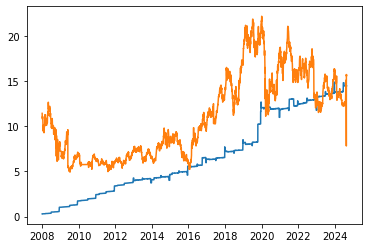

In [15]:
plt.plot(df_bbdc['Date'], df_bbdc['Preço Justo (basin 8.0%)'])
plt.plot(df_bbdc['Date'], df_bbdc['Average'])

In [16]:
inv10['Preço Justo (Graham)'] = np.sqrt(22.5 * inv10['VPA'] * inv10['LPA'])

In [17]:
statinv['Preço Justo (Graham)'] = np.sqrt(22.5 * statinv['VPA'] * statinv['LPA'])

C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
fundamentus = pd.read_csv('Sites_fundamentos/Fundamentos_Fundamentus.csv')
fundamentus['Preço Justo (Graham)'] = np.sqrt(22.5 * (fundamentus['VPA'] * fundamentus['LPA'])/10000)

C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
print(len(statinv))
print(len(inv10))

624
227


In [25]:
statinv.columns

Index(['Ticker', 'Preço', 'Analistas', 'DY', 'P/L', 'PEG Ratio', 'P/VP',
       'P/Ativos', 'Margem Bruta', 'Margem Ebit', 'Marg. Líquida', 'P/EBIT',
       'EV/EBIT', 'Dívida Líquida / EBIT', 'Dívida Líquida / Patrimônio',
       'PSR', 'P/Cap. Giro', 'Preço sobre Ativo Circ. Líq.', 'ROE', 'ROIC',
       'ROA', 'Liquidez Corrente', 'Patrimônio / Ativos', 'Passivos / Ativos',
       'Giro Ativos', 'CAGR Receitas 5 Anos', 'CAGR Lucros 5 Anos',
       'Liquidez média diária', 'VPA', 'LPA', 'Valor de mercado', 'dt_ref',
       'Preço Justo (Graham)', 'Price'],
      dtype='object')

### Inferindo status

In [19]:
# Limpar e formatar a coluna 'Ticker'
statinv['Ticker'] = statinv['Ticker'].str.strip().str.upper()

# Limpar e formatar a coluna 'Preço' para float
statinv['Price'] = statinv['Preço'].str.replace(r'[R$.]', '', regex=True).str.replace(',', '.').astype(float)

# Garantir que a coluna 'date' em df está em formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Para cada linha em statinv onde 'Price' é 0
for i, row in statinv[statinv['Price'] == 0].iterrows():
    ticker = row['Ticker']
    
    # Filtrar df para o 'Papel' correspondente ao 'Ticker' de statinv
    df_filtered = df[df['Papel'] == ticker]
    
    if not df_filtered.empty:
        # Encontrar a data mais recente
        latest_row = df_filtered.loc[df_filtered['Date'].idxmax()]
        
        # Pegar o valor de 'Average' da data mais recente
        average_value = latest_row['Average']
        
        # Atualizar a coluna 'Price' em statinv com esse valor
        statinv.at[i, 'Price'] = average_value

# Filtrar onde 'Preço Justo (Graham)' é maior que 50 vezes o 'Price'
inf = statinv[statinv['Preço Justo (Graham)'] > statinv['Price']*50][['Ticker', 'Preço', 'Preço Justo (Graham)']].copy()


In [20]:
inf = inf.reset_index(drop=True)
inf

,Ticker,Preço,Preço Justo (Graham)
0,ANDG4B,"R$ 0,00",11.821675
1,APTI3,"R$ 197,64",28162.475033
2,BAUH3,"R$ 0,00",45.323860
3,BFRE11,"R$ 0,00",383506.909977
4,BFRE12,"R$ 0,00",383506.909977
5,BRBI3,"R$ 0,00",5.975764
6,BRBI4,"R$ 0,00",5.975764
7,BRQB3,"R$ 0,00",4.364459
8,CATA4,"R$ 0,00",1988.102739
9,CCXC3,"R$ 1,16",68.013447


### Inferindo Investidor 10

In [21]:
inv10['Price'] = inv10['Preço'].str.replace(r'[R$.]', '', regex=True).str.replace(',', '.').astype(float)
inf10 = inv10[inv10['Preço Justo (Graham)'] > inv10['Price']*50][['Ticker', 'Preço', 'Preço Justo (Graham)']].copy()

In [22]:
inf10['Ticker'] = inf10['Ticker'].str.strip().str.upper()
for k in range(len(inf)):
    display(inv10[inv10['Ticker'] == inf['Ticker'][k]])

,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


,Ticker,Preço,P/L,DY,DY Médio 5 anos,P/VP,P/EBIT,P/Ativos,EV/EBIT,Margem Bruta,...,Patrimônio / Ativos,Passivos / Ativos,Liquidez Corrente,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price


### Inferindo fundamentus

In [23]:
inffund = fundamentus[fundamentus['Preço Justo (Graham)'] > fundamentus['Cotação']*50][['Papel', 'Cotação', 'Preço Justo (Graham)']].copy()
inffund = inffund.reset_index(drop = True)

In [24]:
for k in range(len(inf)):
    display(fundamentus[fundamentus['Papel'] == inf['Ticker'][k]])

,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
201,CCXC3,1.16,-0.48,-0.04,0.0,0.0,185.000,0.0,-0.65,0.0,...,-750000.0,1446000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,41.156184
1701,CCXC3,1.16,-0.48,-0.04,0.0,0.0,0.185,0.0,-0.65,0.0,...,-750000.0,1446000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,41.156184


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
248,CORR3,12.0,0.04,0.06,834.000,0.0,17.000,0.03,-0.08,0.42,...,-774000.0,-678000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,1181.566343
1106,CORR3,12.0,0.04,0.06,NaN,0.0,17.000,0.03,-0.08,0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,NaN
1741,CORR3,12.0,0.04,0.06,0.834,0.0,0.017,0.03,-0.08,0.42,...,-774000.0,-678000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,1181.566343


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
408,FBMC4,1.96,-0.09,-0.02,95.000,0.0,34.000,-0.04,-0.07,-0.02,...,-3952000.0,-2584000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,203.963214
1890,FBMC4,1.96,-0.09,-0.02,0.095,0.0,0.034,-0.04,-0.07,-0.02,...,-3952000.0,-2584000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,203.963214


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
461,GSHP3,11.5,-0.07,-0.02,133.000,0.0,15.000,-3.18,0.43,-0.01,...,14437000.0,-240848000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,1405.433737
1938,GSHP3,11.5,-0.07,-0.02,0.133,0.0,0.015,-3.18,0.43,-0.01,...,14437000.0,-240848000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,1405.433737


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
590,MMAQ3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5767000.0,6612000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,0.0
1285,MMAQ3,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,NaN
2054,MMAQ3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5767000.0,6612000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,0.0


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
591,MMAQ4,200.06,0.3,0.03,8.000,0.0,16.000,0.05,-0.34,0.05,...,-5767000.0,6612000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,9469.159022
1286,MMAQ4,200.06,0.3,0.03,NaN,0.0,16.000,0.05,-0.34,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,NaN
2055,MMAQ4,200.06,0.3,0.03,0.008,0.0,0.016,0.05,-0.34,0.05,...,-5767000.0,6612000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,9469.159022


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
640,ODER3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4796000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,0.0


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
652,OSXB3,3.86,-0.01,0.0,206.000,0.0,5.000,-0.01,-0.34,0.0,...,-21528000.0,-293989000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,4602.169793
2112,OSXB3,3.86,-0.01,0.0,0.206,0.0,0.005,-0.01,-0.34,0.0,...,-21528000.0,-293989000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,4602.169793


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
682,PMAM3,2.01,-0.08,-0.02,273.000,0.0,74.000,-0.03,-0.3,-0.02,...,-51161000.0,-670762000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,214.981322
1343,PMAM3,2.01,-0.08,-0.02,NaN,0.0,74.000,-0.03,-0.3,-0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,NaN
2139,PMAM3,2.01,-0.08,-0.02,0.273,0.0,0.074,-0.03,-0.3,-0.02,...,-51161000.0,-670762000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,214.981322


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
761,RPMG3,2.75,-0.18,-0.03,36.000,0.0,25.000,-0.18,-0.15,-0.03,...,-304468000.0,-196984000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,169.229333
1386,RPMG3,2.75,-0.18,-0.03,NaN,0.0,25.000,-0.18,-0.15,-0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,NaN
2208,RPMG3,2.75,-0.18,-0.03,0.036,0.0,0.025,-0.18,-0.15,-0.03,...,-304468000.0,-196984000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,169.229333


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
858,TEKA3,42.5,-0.15,-0.01,69.000,0.0,18.000,-0.01,2.33,-0.01,...,3914000.0,-28603000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,5213.759891
1446,TEKA3,42.5,-0.15,-0.01,NaN,0.0,18.000,-0.01,2.33,-0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,NaN
2296,TEKA3,42.5,-0.15,-0.01,0.069,0.0,0.018,-0.01,2.33,-0.01,...,3914000.0,-28603000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,5213.759891


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
859,TEKA4,30.0,-0.11,-0.01,49.000,0.0,12.000,-0.01,1.65,0.0,...,3914000.0,-28603000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,5213.759891
1447,TEKA4,30.0,-0.11,-0.01,NaN,0.0,12.000,-0.01,1.65,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,NaN
2297,TEKA4,30.0,-0.11,-0.01,0.049,0.0,0.012,-0.01,1.65,0.0,...,3914000.0,-28603000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,5213.759891


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
652,OSXB3,3.86,-0.01,0.0,206.000,0.0,5.000,-0.01,-0.34,0.0,...,-21528000.0,-293989000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,4602.169793
2112,OSXB3,3.86,-0.01,0.0,0.206,0.0,0.005,-0.01,-0.34,0.0,...,-21528000.0,-293989000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,4602.169793


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
682,PMAM3,2.01,-0.08,-0.02,273.000,0.0,74.000,-0.03,-0.3,-0.02,...,-51161000.0,-670762000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,214.981322
1343,PMAM3,2.01,-0.08,-0.02,NaN,0.0,74.000,-0.03,-0.3,-0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,NaN
2139,PMAM3,2.01,-0.08,-0.02,0.273,0.0,0.074,-0.03,-0.3,-0.02,...,-51161000.0,-670762000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,214.981322


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
761,RPMG3,2.75,-0.18,-0.03,36.000,0.0,25.000,-0.18,-0.15,-0.03,...,-304468000.0,-196984000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,169.229333
1386,RPMG3,2.75,-0.18,-0.03,NaN,0.0,25.000,-0.18,-0.15,-0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,NaN
2208,RPMG3,2.75,-0.18,-0.03,0.036,0.0,0.025,-0.18,-0.15,-0.03,...,-304468000.0,-196984000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,169.229333


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
858,TEKA3,42.5,-0.15,-0.01,69.000,0.0,18.000,-0.01,2.33,-0.01,...,3914000.0,-28603000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,5213.759891
1446,TEKA3,42.5,-0.15,-0.01,NaN,0.0,18.000,-0.01,2.33,-0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,NaN
2296,TEKA3,42.5,-0.15,-0.01,0.069,0.0,0.018,-0.01,2.33,-0.01,...,3914000.0,-28603000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,5213.759891


,Papel,Cotação,P/L,P/VP,PSR_x,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m,dt_ref,Preço Justo (Graham)
859,TEKA4,30.0,-0.11,-0.01,49.000,0.0,12.000,-0.01,1.65,0.0,...,3914000.0,-28603000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,5213.759891
1447,TEKA4,30.0,-0.11,-0.01,NaN,0.0,12.000,-0.01,1.65,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-19,NaN
2297,TEKA4,30.0,-0.11,-0.01,0.049,0.0,0.012,-0.01,1.65,0.0,...,3914000.0,-28603000.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24,5213.759891


## Obs:
Mesmo após observar os dados que estão estranhos na base do status invest, continuam estranho em outras bases ou 
nem que quer temos eles. Por isso vamos deliniar nossos papéis na base do status invest, removendo as ações estranhas, vamos
apenas trabalhar com essas ações em todas as bases.

### Ajustando e comparando o nicho de interesse

In [25]:
renomeacoes = {
    'Papel': 'Ticker',
    'Cotação': 'Preço',
    'Div.Yield': 'DY',
    'P/Ativ Circ.Liq': 'Preço sobre Ativo Circ. Líq.',
    'Mrg Ebit': 'Margem Ebit',
    'Mrg. Líq.': 'Marg. Líquida',
    'Liq. Corr.': 'Liquidez Corrente',
    'Patrim. Líq': 'Patrimônio / Ativos',
    'Dív.Brut/ Patrim.': 'Dívida Líquida / Patrimônio',
    'Cresc. Rec.5a': 'CAGR Receitas 5 Anos',
    'PAtivos': 'P/Ativos',
    'PCap_Giro': 'P/Cap. Giro',
    'Marg_Bruta': 'Margem Bruta',
    'Giro_Ativos': 'Giro Ativos',
    'ROIC_x': 'ROIC',
    'ROE_x': 'ROE',
    'PSR_x': 'PSR'
}
fundamentus = fundamentus.rename(columns=renomeacoes)

In [26]:
#nova versão
Status_filtrado = statinv[~statinv['Ticker'].isin(inf['Ticker'])].reset_index(drop=True)
Status_filtrado['Ticker'] = Status_filtrado['Ticker'].str.strip().str.upper()

tickers_alvo = Status_filtrado['Ticker'].tolist()

inv10_filtrado = inv10[inv10['Ticker'].isin(tickers_alvo)].reset_index(drop=True)
inv10_filtrado['Ticker'] = inv10_filtrado['Ticker'].str.strip().str.upper()

fund_filtrado = fundamentus[fundamentus['Ticker'].isin(tickers_alvo)].reset_index(drop=True)
fund_filtrado['Ticker'] = fund_filtrado['Ticker'].str.strip().str.upper()

df_filtered = df[df['Papel'].isin(tickers_alvo)].reset_index(drop=True)


In [27]:
Status_filtrado['DY'] = Status_filtrado['DY']/100 #correção pelo percentual

In [28]:
colun = [col for col in Status_filtrado.columns if col in inv10.columns]

Status_filtrado = Status_filtrado[colun]
inv10_filtrado = inv10_filtrado[colun]

In [29]:
fund_filtrado['ROA'],fund_filtrado['Dívida Líquida / EBIT'],fund_filtrado['Passivos / Ativos'] = None, None, None
fund_filtrado['CAGR Lucros 5 Anos'] = None
fund_filtrado['Price'] = fund_filtrado['Preço']
fund_filtrado = fund_filtrado[colun]

In [30]:
fund_filtrado.columns

Index(['Ticker', 'Preço', 'DY', 'P/L', 'P/VP', 'P/Ativos', 'Margem Bruta',
       'Margem Ebit', 'Marg. Líquida', 'P/EBIT', 'EV/EBIT',
       'Dívida Líquida / EBIT', 'Dívida Líquida / Patrimônio', 'PSR',
       'P/Cap. Giro', 'Preço sobre Ativo Circ. Líq.', 'ROE', 'ROIC', 'ROA',
       'Liquidez Corrente', 'Patrimônio / Ativos', 'Passivos / Ativos',
       'Giro Ativos', 'CAGR Receitas 5 Anos', 'CAGR Lucros 5 Anos', 'VPA',
       'LPA', 'dt_ref', 'Preço Justo (Graham)', 'Price'],
      dtype='object')

In [31]:
final_col = [col for col in colun if col != 'dt_ref']
final_col = final_col[2:]

In [32]:
def replace_dash(value):
    return '' if value == '-' else value

col = final_col.copy()
col.remove('Price')

for k in range(len(col)):
    try:
        # Tenta limpar e converter valores com formatação
        fund_filtrado[col[k]] = fund_filtrado[col[k]].apply(replace_dash).replace(r'[,.]', '', regex=True)\
                               .replace(r'^\s*$', np.nan, regex=True).astype(float)
    except ValueError:
        # Caso a conversão falhe, trata a coluna conforme seu tipo
        if fund_filtrado[col[k]].dtype == 'int64':
            fund_filtrado[col[k]] = fund_filtrado[col[k]].astype(float)# / 100
        elif fund_filtrado[col[k]].dtype == 'O':
            fund_filtrado[col[k]] = fund_filtrado[col[k]].apply(replace_dash).replace('-', '').replace(r'^\s*$', np.nan, regex=True)
            fund_filtrado[col[k]] = fund_filtrado[col[k]].str.replace(r'[.%mil]', '', regex=True)
            #convertendo , forma decimal br para . forma decimal eua
            fund_filtrado[col[k]] = fund_filtrado[col[k]].replace(r'[,]', '.', regex=True).astype(float) / 100
            fund_filtrado[col[k]] = fund_filtrado[col[k]].round(4)

# Reinicie os índices do DataFrame após a alteração
fund_filtrado.reset_index(drop=True, inplace=True)

In [33]:
# Correção manual ordem de grandeza
fund_filtrado['VPA']= fund_filtrado['VPA']/100
fund_filtrado['LPA']= fund_filtrado['LPA']/100
fund_filtrado['Margem Bruta']= fund_filtrado['Margem Bruta']*10
fund_filtrado['Margem Ebit']= fund_filtrado['Margem Ebit']*100
fund_filtrado['Marg. Líquida']= fund_filtrado['Marg. Líquida']*100
fund_filtrado['PSR']= fund_filtrado['PSR']/1000
fund_filtrado['P/Cap. Giro']= fund_filtrado['P/Cap. Giro']/100
fund_filtrado['ROE']= fund_filtrado['ROE']*100
fund_filtrado['Giro Ativos']= fund_filtrado['Giro Ativos']/100
fund_filtrado['P/Ativos']= fund_filtrado['P/Ativos']/100

In [34]:
%%time

def new_element(df, col):
    values_col = []
    
    # Selecionar as colunas necessárias, garantindo que as chaves sejam únicas
    temp1 = Status_filtrado[['Ticker', 'dt_ref', col]].drop_duplicates(subset=['Ticker', 'dt_ref']).copy()
    temp2 = fund_filtrado[['Ticker', 'dt_ref', col]].drop_duplicates(subset=['Ticker', 'dt_ref']).copy()
    temp3 = inv10_filtrado[['Ticker', 'dt_ref', col]].drop_duplicates(subset=['Ticker', 'dt_ref']).copy()

    # Renomear as colunas
    temp1 = temp1.rename(columns={col: '1'})
    temp2 = temp2.rename(columns={col: '2'})
    temp3 = temp3.rename(columns={col: '3'})

    # Merge entre os DataFrames com 'outer' para garantir que todos os dados sejam preservados
    temp = (
        temp1.merge(temp2, on=['Ticker', 'dt_ref'], how='outer')
             .merge(temp3, on=['Ticker', 'dt_ref'], how='outer')
             .reset_index(drop=True)
    )

    # Calcular a mediana para cada linha
    for k in range(len(temp)):
        li_tem = [temp['1'][k], temp['2'][k], temp['3'][k]]

        # Filtrar apenas valores numéricos
        lista_sem_nan = [x for x in li_tem if pd.notna(x) and isinstance(x, (int, float))]

        # Verificar se há elementos para calcular a mediana
        if lista_sem_nan:
            med = np.median(lista_sem_nan)
            if pd.notna(temp['1'][k]) and temp['1'][k] != 0:
                # Evitar divisão por zero e garantir que o valor seja numérico
                if abs((temp['1'][k] - med) / temp['1'][k]) < 0.2:
                    values_col.append(med)
                else:
                    values_col.append(temp['1'][k])
            else:
                values_col.append(med)  # Caso o valor seja 0 ou NaN, usa a mediana
        else:
            values_col.append(np.nan)  # Caso todos os valores sejam NaN

    # Preencher o restante das linhas para evitar desajuste de tamanho
    if len(values_col) < len(df):
        values_col.extend([np.nan] * (len(df) - len(values_col)))
    elif len(values_col) > len(df):
        values_col = values_col[:len(df)]

    # Adicionar a nova coluna ao DataFrame final
    df[col] = values_col

# Criar df_final sem duplicatas e adicionar novas colunas
df_final = Status_filtrado[['Ticker', 'dt_ref']].drop_duplicates().reset_index(drop=True)

# Iterar sobre final_col para adicionar as colunas
for k in range(len(final_col)):
    new_element(df_final, final_col[k])

# Exibir df_final
print(df_final)


     Ticker      dt_ref      DY     P/L   P/VP  P/Ativos  Margem Bruta  \
0     AALR3  2024-08-19  0.0000  -7.320  1.560     0.605        29.800   
1     ABCB4  2024-08-19  0.0649   6.170  0.920     0.095        16.540   
2     ABEV3  2024-08-19  0.0561  14.210  2.150     1.430        50.830   
3     ADHM3  2024-08-19  0.0000  -4.090 -1.290   105.125       100.000   
4     AERI3  2024-08-19  0.0000  -4.630  0.530     0.160        12.635   
...     ...         ...     ...     ...    ...       ...           ...   
1009  WIZC3  2024-08-24  0.0393   5.760  1.830     0.400        63.000   
1010  WLMM3  2024-08-24  0.0315   7.490  1.360     0.930        11.410   
1011  WLMM4  2024-08-24  0.0266   9.345  1.705     1.165        11.405   
1012  YDUQ3  2024-08-24  0.0265  21.770  1.010     0.340        60.170   
1013  ZAMP3  2024-08-24  0.0000  -9.835  0.750     0.215        66.305   

      Margem Ebit  Marg. Líquida  P/EBIT  ...  Liquidez Corrente  \
0           3.785        -17.945  36.170  .

In [36]:
df_final

,Ticker,dt_ref,DY,P/L,P/VP,P/Ativos,Margem Bruta,Margem Ebit,Marg. Líquida,P/EBIT,...,Liquidez Corrente,Patrimônio / Ativos,Passivos / Ativos,Giro Ativos,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,Preço Justo (Graham),Price
0,AALR3,2024-08-19,0.0000,-7.320,1.560,0.605,29.800,3.785,-17.945,36.170,...,0.72,0.38,0.610,0.450,1.8400,0.000,8.70,-1.85,NaN,13.51
1,ABCB4,2024-08-19,0.0649,6.170,0.920,0.095,16.540,9.380,10.000,6.950,...,0.00,0.10,0.905,0.135,20.0800,14.115,25.48,3.81,46.736207,23.51
2,ABEV3,2024-08-19,0.0561,14.210,2.150,1.430,50.830,23.880,17.850,10.620,...,1.11,0.66,0.330,0.560,8.9200,4.750,6.05,0.91,11.129858,12.98
3,ADHM3,2024-08-19,0.0000,-4.090,-1.290,105.125,100.000,-13548.480,-18860.610,-5.690,...,0.00,-81.72,82.720,0.140,0.2174,0.000,-1.21,-0.38,3.216442,1.56
4,AERI3,2024-08-19,0.0000,-4.630,0.530,0.160,12.635,5.440,-5.890,4.045,...,1.54,0.30,0.700,0.595,34.3400,0.000,17.62,-2.07,NaN,9.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,WIZC3,2024-08-24,0.0393,5.760,1.830,0.400,63.000,43.390,14.400,1.910,...,0.98,0.22,0.510,0.480,12.1300,-0.420,3.43,1.09,9.171736,6.27
1010,WLMM3,2024-08-24,0.0315,7.490,1.360,0.930,11.410,6.630,4.400,4.980,...,2.56,0.68,0.320,2.830,23.0200,52.920,20.28,3.69,41.033486,27.65
1011,WLMM4,2024-08-24,0.0266,9.345,1.705,1.165,11.405,6.230,4.400,6.615,...,2.56,0.68,0.320,2.830,25.9000,52.920,20.28,3.69,41.033486,34.50
1012,YDUQ3,2024-08-24,0.0265,21.770,1.010,0.340,60.170,14.760,2.760,4.070,...,1.68,0.33,0.660,0.560,7.3000,-25.560,10.17,0.47,10.370523,10.31


In [37]:
bbdcf = df_final[df_final['Ticker'] == 'BBDC3']
bbdc = Status_filtrado[Status_filtrado['Ticker'] == 'BBDC3']
bbin = fund_filtrado[fund_filtrado['Ticker'] == 'BBDC3']
bbsfun = inv10_filtrado[inv10_filtrado['Ticker'] == 'BBDC3']

In [38]:
display(bbdcf)
display(bbdc)
display(bbin)
display(bbsfun)

,Ticker,dt_ref,DY,P/L,P/VP,P/Ativos,Margem Bruta,Margem Ebit,Marg. Líquida,P/EBIT,...,Liquidez Corrente,Patrimônio / Ativos,Passivos / Ativos,Giro Ativos,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,Preço Justo (Graham),Price
46,BBDC3,2024-08-19,0.0848,11.22,0.91,0.07,31.335,4.13,6.06,16.80,...,10.17,0.08,0.92,0.11,14.8,-4.25,15.47,1.25,20.858901,14.07
627,BBDC3,2024-08-24,0.0840,11.32,0.92,0.08,31.335,4.13,6.06,16.96,...,10.17,0.08,0.92,0.11,14.8,-4.25,15.47,1.25,20.858901,14.20


,Ticker,Preço,DY,P/L,P/VP,P/Ativos,Margem Bruta,Margem Ebit,Marg. Líquida,P/EBIT,...,Patrimônio / Ativos,Passivos / Ativos,Giro Ativos,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price
46,BBDC3,"R$ 14,07",0.0848,11.22,0.91,0.07,31.15,4.16,6.22,16.80,...,0.08,0.92,0.11,14.8,-4.25,15.47,1.25,2024-08-19,20.858901,14.07
627,BBDC3,"R$ 14,20",0.0840,11.32,0.92,0.08,31.15,4.16,6.22,16.96,...,0.08,0.92,0.11,14.8,-4.25,15.47,1.25,2024-08-24,20.858901,14.20


,Ticker,Preço,DY,P/L,P/VP,P/Ativos,Margem Bruta,Margem Ebit,Marg. Líquida,P/EBIT,...,Patrimônio / Ativos,Passivos / Ativos,Giro Ativos,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price
45,BBDC3,14.09,0.0846,9.83,0.94,NaN,NaN,0.0,0.0,0.0,...,1.600860e+11,NaN,NaN,-228.000,NaN,15.04,1.43,2024-08-19,21.998,14.09
573,BBDC3,14.09,0.0846,9.83,0.94,NaN,NaN,0.0,0.0,0.0,...,1.600860e+11,NaN,NaN,-228.000,NaN,NaN,NaN,2024-08-19,NaN,14.09
924,BBDC3,14.09,0.0846,9.83,0.94,NaN,NaN,0.0,0.0,0.0,...,1.600860e+11,NaN,NaN,-0.228,NaN,15.04,1.43,2024-08-24,21.998,14.09


,Ticker,Preço,DY,P/L,P/VP,P/Ativos,Margem Bruta,Margem Ebit,Marg. Líquida,P/EBIT,...,Patrimônio / Ativos,Passivos / Ativos,Giro Ativos,CAGR Receitas 5 Anos,CAGR Lucros 5 Anos,VPA,LPA,dt_ref,Preço Justo (Graham),Price
7,BBDC3,"R$ 14,07",0.0894,11.45,0.91,0.07,31.52,4.13,6.06,16.80,...,0.08,0.92,0.11,16.85,-9.99,15.47,1.23,2024-08-19,20.691357,14.07
232,BBDC3,"R$ 14,20",0.0840,11.56,0.92,0.08,31.52,4.13,6.06,16.96,...,0.08,0.92,0.11,16.85,-9.99,15.47,1.23,2024-08-24,20.691357,14.20


### Fundamentos Históricos

In [39]:
fund_hist = pd.read_csv('Histórico_fundamentalista.csv')

In [40]:
# Corrigir a conversão da coluna 'Ano' para string sem sobrescrever fund_hist
fund_hist['Ano'] = fund_hist['Ano'].astype(str)

# Calcular a mediana para todas as colunas numéricas, exceto 'Ano' e 'Ativo', por 'Ativo' e 'Ano'
median_all_cols = (
    fund_hist.groupby(['Ativo', 'Ano'])
    .median(numeric_only=True)
    .reset_index()
)

# Calcular a mediana histórica (por 'Ativo') para todas as colunas numéricas, exceto 'Ano' e 'Ativo'
median_historico_all_cols = (
    median_all_cols.groupby('Ativo')
    .median(numeric_only=True)
    .reset_index()
)

# Renomear as colunas para indicar que são medianas históricas (opcional)
median_historico_all_cols = median_historico_all_cols.rename(
    columns={col: f'{col}_Mediana_Historica' for col in median_historico_all_cols.columns if col not in ['Ativo']}
)

# Exibir o DataFrame resultante
median_historico_all_cols


,Ativo,LPA_Mediana_Historica,P/L_Mediana_Historica,VPA_Mediana_Historica,P/VP_Mediana_Historica,P/EBIT_Mediana_Historica,P/EBITDA_Mediana_Historica,P/Ativos_Mediana_Historica,Ebitda_Mediana_Historica,Marg. Ebitda_Mediana_Historica,...,ROA_Mediana_Historica,ROIC_Mediana_Historica,EV/EBIT_Mediana_Historica,EV/EBITDA_Mediana_Historica,Div. Yield_Mediana_Historica,Div. Payout_Mediana_Historica,Beta_Mediana_Historica,Valorização_Mediana_Historica,Negócios/dia_Mediana_Historica,Volume diário_Mediana_Historica
0,AALR3,0.030,30.280,10.340,1.390,16.670,10.860,0.710,1.500,0.140,...,0.000,0.030,17.560,13.160,0.00000,0.0000,0.410,0.010,3.0920,6.0
1,ABCB4,2.025,7.025,15.790,0.960,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.04535,0.3620,0.705,0.120,31.0310,4.0
2,ABEV3,1.705,19.890,8.105,4.360,14.270,11.645,2.135,17.852,0.405,...,0.110,0.185,1321.635,1248.635,0.04580,0.6529,51.000,0.115,27.1805,16.5
3,AEE11,2.910,8.240,13.270,1.780,5.070,5.030,0.780,1.538,0.900,...,0.100,0.150,10.180,10.170,0.16150,0.8499,0.360,0.200,7.2660,39.0
4,AERI3,-0.090,-2.850,1.260,0.980,4.220,3.390,0.280,2.660,0.110,...,-0.020,0.100,4.470,3.860,0.00000,0.0000,1.260,-0.380,5.4600,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,WHRL3,0.415,11.060,1.435,2.945,9.475,7.980,0.870,449.500,0.110,...,0.095,0.245,8.140,6.760,0.11055,0.7002,0.125,0.050,5.0000,0.0
299,WHRL4,0.415,12.145,1.435,3.095,10.455,8.350,0.965,449.500,0.110,...,0.095,0.245,8.325,6.915,0.11065,0.7002,0.325,0.060,19.0000,0.0
300,WIZC3,1.315,6.090,3.455,2.955,3.685,3.655,0.965,3.600,0.470,...,0.165,0.355,2.385,2.315,0.08940,0.5221,0.900,-0.080,3.1240,8.5
301,YDUQ3,0.870,23.900,8.610,2.830,17.510,11.990,1.550,123.000,0.220,...,0.090,0.100,12.110,6.320,0.01370,0.3421,0.960,0.140,13.8790,62.0


In [41]:
median_historico_all_cols = median_historico_all_cols.rename(columns={'Ativo': 'Ticker'})

In [42]:
df_final = df_final.merge(median_historico_all_cols, on = 'Ticker', how = 'left')

In [43]:
df_final['Preço Justo Valuation']  = df_final['Price']/(df_final['P/L']/df_final['P/L_Mediana_Historica'])\
                                                                    .apply(lambda x: np.nan if x < 0 else x)

In [44]:
#Garantido as informações da data mais recente.
df_final['dt_ref'] = pd.to_datetime(df_final['dt_ref'])

# Ordenar o DataFrame por 'Ticker' e 'Data' (mais recente primeiro)
df = df_final.sort_values(by=['Ticker', 'dt_ref'], ascending=[True, False])

# Manter apenas a linha mais recente para cada 'Ticker'
df_recentes = df.drop_duplicates(subset='Ticker', keep='first')
df_recentes['dt_ref'] = df_recentes['dt_ref'].dt.strftime('%Y-%m-%d')


C:\Users\Acer\AppData\Local\Temp\ipykernel_11736\1132208454.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recentes['dt_ref'] = df_recentes['dt_ref'].dt.strftime('%Y-%m-%d')


In [47]:
df_recentes = df_recentes.reset_index(drop=True)

In [49]:
df_recentes.to_excel('df_final_fundamentos.xlsx', index=False)

## Indicadores angulares & Basin

In [3]:
df = pd.read_csv('preço_diário_histórico_basin.csv')
df

,Date,Open,High,Low,Close,Volume,Average,Dividends,Papel,5AnosAtrás,MovingMean5years,Preço Justo (basin 6.0%),Preço Justo (basin 8.0%),Preço Justo (basin 10.0%)
0,2016-10-28,19.106026,19.561404,18.729846,19.007032,6342600,19.056529,NaN,AALR3,2011-10-28,0.000000,0.000000,0.000000,0.00000
1,2016-10-31,18.997133,19.007032,17.334017,17.878489,2523300,18.437811,NaN,AALR3,2011-10-31,0.000000,0.000000,0.000000,0.00000
2,2016-11-01,17.878488,18.195272,16.987534,17.720097,996200,17.799292,NaN,AALR3,2011-11-01,0.000000,0.000000,0.000000,0.00000
3,2016-11-03,17.819090,18.056678,17.136025,17.809191,621000,17.814141,NaN,AALR3,2011-11-03,0.000000,0.000000,0.000000,0.00000
4,2016-11-04,17.769596,17.937888,17.532007,17.571606,389800,17.670601,NaN,AALR3,2011-11-04,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000197,2024-08-19,3.420000,3.500000,3.380000,3.490000,487600,3.455000,NaN,ZAMP3,2019-08-19,0.010087,0.168117,0.126087,0.10087
2000198,2024-08-20,3.460000,3.510000,3.460000,3.500000,41400,3.480000,NaN,ZAMP3,2019-08-20,0.010087,0.168117,0.126087,0.10087
2000199,2024-08-21,3.450000,3.510000,3.440000,3.460000,415000,3.455000,NaN,ZAMP3,2019-08-21,0.010087,0.168117,0.126087,0.10087
2000200,2024-08-22,3.480000,3.480000,3.390000,3.440000,447200,3.460000,NaN,ZAMP3,2019-08-22,0.010087,0.168117,0.126087,0.10087


In [4]:
def hist_value(ticker='BBDC4.SA', dt_start = datetime.strptime('2023-08-13', '%Y-%m-%d').date()):
    try:
        # Criar um objeto Ticker com yfinance
        stock = yf.Ticker(ticker)

        # Obter todo o histórico de preços
        historical_data = stock.history(start = dt_start, interval='1h')

    except ValueError as ve:
        print(ve)
        return pd.DataFrame()  # Retorna um DataFrame vazio em caso de erro
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return pd.DataFrame()  # Retorna um DataFrame vazio em caso de erro
    
    return historical_data

In [5]:
%%time
# Carregar os dados do arquivo Excel com ações alvo
dates = pd.read_excel('df_final_fundametos.xlsx')

# Converter a coluna 'dt_ref' para o tipo datetime
dates['dt_ref'] = pd.to_datetime(dates['dt_ref'])

# Subtrair 2 dias de cada data na coluna 'dt_ref'
dates['past_date'] = dates['dt_ref'] - timedelta(days=2)
dates

Wall time: 810 ms


,Ticker,dt_ref,DY,P/L,P/VP,P/Ativos,Margem Bruta,Margem Ebit,Marg. Líquida,P/EBIT,...,EV/EBIT_Mediana_Historica,EV/EBITDA_Mediana_Historica,Div. Yield_Mediana_Historica,Div. Payout_Mediana_Historica,Beta_Mediana_Historica,Valorização_Mediana_Historica,Negócios/dia_Mediana_Historica,Volume diário_Mediana_Historica,Preço Justo Valuation,past_date
0,AALR3,2024-08-24,0.0000,-7.720,1.650,0.640,29.800,3.785,-17.945,38.425,...,17.560,13.160,0.00000,0.0000,0.410,0.010,3.0920,6.0,NaN,2024-08-22
1,ABCB4,2024-08-24,0.0648,6.180,0.920,0.095,16.540,9.380,10.000,6.960,...,NaN,NaN,0.04535,0.3620,0.705,0.120,31.0310,4.0,26.770024,2024-08-22
2,ABEV3,2024-08-24,0.0558,14.320,2.160,1.440,50.830,23.880,17.850,10.700,...,1321.635,1248.635,0.04580,0.6529,51.000,0.115,27.1805,16.5,18.167682,2024-08-22
3,ADHM3,2024-08-19,0.0000,-4.090,-1.290,105.125,100.000,-13548.480,-18860.610,-5.690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-17
4,AERI3,2024-08-24,0.0000,-3.750,0.520,0.155,12.635,5.440,-5.890,3.920,...,4.470,3.860,0.00000,0.0000,1.260,-0.380,5.4600,10.0,6.942600,2024-08-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,WIZC3,2024-08-24,0.0393,5.760,1.830,0.400,63.000,43.390,14.400,1.910,...,2.385,2.315,0.08940,0.5221,0.900,-0.080,3.1240,8.5,6.629219,2024-08-22
582,WLMM3,2024-08-24,0.0315,7.490,1.360,0.930,11.410,6.630,4.400,4.980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-22
583,WLMM4,2024-08-24,0.0266,9.345,1.705,1.165,11.405,6.230,4.400,6.615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-22
584,YDUQ3,2024-08-24,0.0265,21.770,1.010,0.340,60.170,14.760,2.760,4.070,...,12.110,6.320,0.01370,0.3421,0.960,0.140,13.8790,62.0,11.318741,2024-08-22


In [6]:
%%time
df = pd.DataFrame()
for k in range(len(dates)):
    # Selecionar um nome de ticker e uma data específica
    ticker = dates['Ticker'].iloc[k]
    dt_start = dates['past_date'].iloc[k]

    # Chamar a função com o nome do ticker e a data específica
    temp = hist_value(f'{ticker}.SA', dt_start=dt_start)
    temp['Ticker'] =  ticker
    df = pd.concat([df,temp])


ADHM3.SA: No data found for this date range, symbol may be delisted
AHEB3.SA: No data found for this date range, symbol may be delisted
AHEB5.SA: No data found for this date range, symbol may be delisted
AHEB6.SA: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker ALSC3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ALSC3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker ANDG3B.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ANDG3B.SA: No timezone found, symbol may be delisted
BALM3.SA: No data found for this date range, symbol may be delisted
BALM4.SA: No data found for this date range, symbol may be delisted
BAUH4.SA: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker BBML3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- BBML3.SA: No timezo

ECPR4.SA: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker EEEL3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- EEEL3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker EEEL4.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- EEEL4.SA: No timezone found, symbol may be delisted
EKTR3.SA: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker ELEK3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ELEK3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker ELEK4.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ELEK4.SA: No timezone found, symbol may be delisted
ELET5.SA: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker ELPL3.SA, Error: {'c

NEMO5.SA: Period '1mo' is invalid, must be one of ['1d', '5d']
OGXP3.SA: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker OMGE3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- OMGE3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker PARD3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- PARD3.SA: No timezone found, symbol may be delisted
PATI4.SA: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker PCAR4.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- PCAR4.SA: No timezone found, symbol may be delisted
PEAB4.SA: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker PNVL4.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- PNVL4.SA: No timezone found, symbol may be de

In [7]:
df['Mean'] = (df['Open'] + df['Close'])/2

In [8]:
df['Contagem'] = df.groupby('Ticker').cumcount() + 1

def calcular_parametros_lineares(grupo):
    x = grupo['Contagem']
    y = grupo['Mean']
    if len(x) > 1 and x.nunique() > 1:  # Verifique se há mais de um ponto e que x não é constante
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        
        # Calcular o erro padrão do intercepto
        n = len(x)
        mean_x = np.mean(x)
        std_err_intercept = std_err * np.sqrt(np.sum((x - mean_x)**2) / n)
        
        return pd.Series({
            'Coeficiente_Angular': slope,
            'Incerteza_Angular': std_err,
            'Intercepto': intercept,
            'Incerteza_Intercepto': std_err_intercept
        })
    else:
        return pd.Series({
            'Coeficiente_Angular': None,
            'Incerteza_Angular': None,
            'Intercepto': None,
            'Incerteza_Intercepto': None
        })

# Calcule os parâmetros lineares e a incerteza para cada grupo de Ticker
resultados = df.groupby('Ticker').apply(calcular_parametros_lineares)

# Adicione as colunas ao DataFrame
df = df.merge(resultados, left_on='Ticker', right_index=True)


In [20]:
df = df.reset_index().rename(columns={'index': 'Data'})

In [22]:
df['Data'] = pd.to_datetime(df['Data']).dt.strftime('%Y-%m-%d %H:%M')

In [24]:
df = df[['Data','Mean','Ticker','Coeficiente_Angular','Incerteza_Angular','Intercepto','Incerteza_Intercepto']]

In [25]:
df.to_excel(f'Angulação_2d.xlsx', index=False)

## Angulação 1 Semana

In [9]:
df = pd.read_csv('preço_diário_histórico_basin.csv')

In [10]:
%%time
# Carregar os dados do arquivo Excel com ações alvo
dates = pd.read_excel('df_final_fundametos.xlsx')

# Converter a coluna 'dt_ref' para o tipo datetime
dates['dt_ref'] = pd.to_datetime(dates['dt_ref'])

# Subtrair 2 dias de cada data na coluna 'dt_ref'
dates['past_date'] = dates['dt_ref'] - timedelta(days=7)

df = pd.DataFrame()
for k in range(len(dates)):
    # Selecionar um nome de ticker e uma data específica
    ticker = dates['Ticker'].iloc[k]
    dt_start = dates['past_date'].iloc[k]

    # Chamar a função com o nome do ticker e a data específica
    temp = hist_value(f'{ticker}.SA', dt_start=dt_start)
    temp['Ticker'] =  ticker
    df = pd.concat([df,temp])
df['Mean'] = (df['Open'] + df['Close'])/2

ADHM3.SA: No data found for this date range, symbol may be delisted
AHEB6.SA: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker ALSC3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ALSC3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker ANDG3B.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ANDG3B.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker BBML3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- BBML3.SA: No timezone found, symbol may be delisted
BDLL3.SA: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker BEEF11.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- BEEF11.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker BIDI11.SA, Error

Got error from yahoo api for ticker ELEK4.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ELEK4.SA: No timezone found, symbol may be delisted
ELET5.SA: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker ELPL3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ELPL3.SA: No timezone found, symbol may be delisted
ENAT3.SA: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker ENBR3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ENBR3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker ENMA3B.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ENMA3B.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker ENMA6B.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be d

PEAB4.SA: No data found for this date range, symbol may be delisted
Got error from yahoo api for ticker PNVL4.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- PNVL4.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker POWE3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- POWE3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker QGEP3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- QGEP3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker QVQP3B.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- QVQP3B.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker RANI4.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- RANI4.SA: No timezone found, symbol may be delisted
Got e

In [11]:
df['Contagem'] = df.groupby('Ticker').cumcount() + 1

def calcular_parametros_lineares(grupo):
    x = grupo['Contagem']
    y = grupo['Mean']
    if len(x) > 1 and x.nunique() > 1:  # Verifique se há mais de um ponto e que x não é constante
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        
        # Calcular o erro padrão do intercepto
        n = len(x)
        mean_x = np.mean(x)
        std_err_intercept = std_err * np.sqrt(np.sum((x - mean_x)**2) / n)
        
        return pd.Series({
            'Coeficiente_Angular': slope,
            'Incerteza_Angular': std_err,
            'Intercepto': intercept,
            'Incerteza_Intercepto': std_err_intercept
        })
    else:
        return pd.Series({
            'Coeficiente_Angular': None,
            'Incerteza_Angular': None,
            'Intercepto': None,
            'Incerteza_Intercepto': None
        })

# Calcule os parâmetros lineares e a incerteza para cada grupo de Ticker
resultados = df.groupby('Ticker').apply(calcular_parametros_lineares)

# Adicione as colunas ao DataFrame
df = df.merge(resultados, left_on='Ticker', right_index=True)
df = df.reset_index().rename(columns={'index': 'dt_ref'})

In [25]:
df['dt_ref'] = pd.to_datetime(df['dt_ref']).dt.strftime('%Y-%m-%d %H:%M')

In [26]:
df = df[['dt_ref','Mean','Ticker','Coeficiente_Angular','Incerteza_Angular','Intercepto','Incerteza_Intercepto']]
df.to_excel(f'Angulação_7d.xlsx', index=False)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker', 'Adj Close', 'Capital Gains', 'Mean', 'Contagem',
       'Coeficiente_Angular', 'Incerteza_Angular', 'Intercepto',
       'Incerteza_Intercepto'],
      dtype='object')

## Angulação 30 dias

In [27]:
df = pd.read_csv('preço_diário_histórico_basin.csv')

In [28]:
def hist_value(ticker='BBDC4.SA', dt_start = datetime.strptime('2023-08-13', '%Y-%m-%d').date()):
    try:
        # Criar um objeto Ticker com yfinance
        stock = yf.Ticker(ticker)

        # Obter todo o histórico de preços
        historical_data = stock.history(start = dt_start, interval='1d')

    except ValueError as ve:
        print(ve)
        return pd.DataFrame()  # Retorna um DataFrame vazio em caso de erro
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return pd.DataFrame()  # Retorna um DataFrame vazio em caso de erro
    
    return historical_data

In [29]:
%%time
# Carregar os dados do arquivo Excel com ações alvo
dates = pd.read_excel('df_final_fundametos.xlsx')

# Converter a coluna 'dt_ref' para o tipo datetime
dates['dt_ref'] = pd.to_datetime(dates['dt_ref'])

# Subtrair 2 dias de cada data na coluna 'dt_ref'
dates['past_date'] = dates['dt_ref'] - timedelta(days=30)

df = pd.DataFrame()
for k in range(len(dates)):
    # Selecionar um nome de ticker e uma data específica
    ticker = dates['Ticker'].iloc[k]
    dt_start = dates['past_date'].iloc[k]

    # Chamar a função com o nome do ticker e a data específica
    temp = hist_value(f'{ticker}.SA', dt_start=dt_start)
    temp['Ticker'] =  ticker
    df = pd.concat([df,temp])
df['Mean'] = (df['Open'] + df['Close'])/2

Got error from yahoo api for ticker ALSC3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ALSC3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker ANDG3B.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ANDG3B.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker BBML3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- BBML3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker BEEF11.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- BEEF11.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker BIDI11.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- BIDI11.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker BIDI3.SA, Error: {'code': 'Not Fo

Got error from yahoo api for ticker FRTA3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- FRTA3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker FTRT3B.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- FTRT3B.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker GBIO33.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- GBIO33.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker GETT11.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- GETT11.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker GETT3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- GETT3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker GETT4.SA, Error: {'code': 'Not Fo

Got error from yahoo api for ticker SPRT3B.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- SPRT3B.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker SQIA3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- SQIA3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker SULA11.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- SULA11.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker SULA3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- SULA3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker SULA4.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- SULA4.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker TCNO3.SA, Error: {'code': 'Not Foun

In [30]:
df['Contagem'] = df.groupby('Ticker').cumcount() + 1

def calcular_parametros_lineares(grupo):
    x = grupo['Contagem']
    y = grupo['Mean']
    if len(x) > 1 and x.nunique() > 1:  # Verifique se há mais de um ponto e que x não é constante
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        
        # Calcular o erro padrão do intercepto
        n = len(x)
        mean_x = np.mean(x)
        std_err_intercept = std_err * np.sqrt(np.sum((x - mean_x)**2) / n)
        
        return pd.Series({
            'Coeficiente_Angular': slope,
            'Incerteza_Angular': std_err,
            'Intercepto': intercept,
            'Incerteza_Intercepto': std_err_intercept
        })
    else:
        return pd.Series({
            'Coeficiente_Angular': None,
            'Incerteza_Angular': None,
            'Intercepto': None,
            'Incerteza_Intercepto': None
        })

# Calcule os parâmetros lineares e a incerteza para cada grupo de Ticker
resultados = df.groupby('Ticker').apply(calcular_parametros_lineares)

# Adicione as colunas ao DataFrame
df = df.merge(resultados, left_on='Ticker', right_index=True)
df = df.reset_index().rename(columns={'index': 'dt_ref'})
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

In [31]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Capital Gains,Adj Close,Mean,Contagem,Coeficiente_Angular,Incerteza_Angular,Intercepto,Incerteza_Intercepto
0,2024-07-25,10.91,11.19,10.41,10.90,70100.0,0.0,0.0,AALR3,NaN,NaN,10.905,1,0.182250,0.041778,9.435714,0.265049
1,2024-07-26,10.72,11.30,10.71,11.00,22200.0,0.0,0.0,AALR3,NaN,NaN,10.860,2,0.182250,0.041778,9.435714,0.265049
2,2024-07-29,11.15,11.28,10.90,10.96,63200.0,0.0,0.0,AALR3,NaN,NaN,11.055,3,0.182250,0.041778,9.435714,0.265049
3,2024-07-30,11.08,11.17,10.85,11.17,8800.0,0.0,0.0,AALR3,NaN,NaN,11.125,4,0.182250,0.041778,9.435714,0.265049
4,2024-07-31,11.17,11.34,11.05,11.24,15600.0,0.0,0.0,AALR3,NaN,NaN,11.205,5,0.182250,0.041778,9.435714,0.265049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10422,2024-08-19,3.42,3.50,3.38,3.49,487600.0,0.0,0.0,ZAMP3,NaN,NaN,3.455,18,0.005486,0.003206,3.306653,0.020343
10423,2024-08-20,3.46,3.51,3.44,3.49,580600.0,0.0,0.0,ZAMP3,NaN,NaN,3.475,19,0.005486,0.003206,3.306653,0.020343
10424,2024-08-21,3.45,3.51,3.44,3.46,415000.0,0.0,0.0,ZAMP3,NaN,NaN,3.455,20,0.005486,0.003206,3.306653,0.020343
10425,2024-08-22,3.48,3.48,3.39,3.44,447200.0,0.0,0.0,ZAMP3,NaN,NaN,3.460,21,0.005486,0.003206,3.306653,0.020343


In [32]:
df = df[['Date','Mean','Ticker','Coeficiente_Angular','Incerteza_Angular','Intercepto','Incerteza_Intercepto']]
df.to_excel(f'Angulação_30d.xlsx', index=False)

In [46]:
teste = filtered_df[filtered_df['Ticker'] == 'AALR3']
filtered_df

,dt_ref,Open,High,Low,Close,Volume,Mean,Dividends,Ticker,5AnosAtrás,MovingMean5years,Preço Justo (basin 6.0%),Preço Justo (basin 8.0%),Preço Justo (basin 10.0%),Contagem,past_date,Coeficiente_Angular,Incerteza_Angular,Intercepto,Incerteza_Intercepto
1926,2024-07-25,10.91,11.19,10.41,10.90,70100,10.905,NaN,AALR3,2019-07-25,0.017459,0.290990,0.218243,0.174594,1927,2024-07-25,0.135638,0.059424,-251.555807,0.012669
1927,2024-07-26,10.72,11.30,10.71,11.00,22200,10.860,NaN,AALR3,2019-07-26,0.017459,0.290990,0.218243,0.174594,1928,2024-07-25,0.135638,0.059424,-251.555807,0.012669
1928,2024-07-29,11.15,11.28,10.90,10.96,63200,11.055,NaN,AALR3,2019-07-29,0.017459,0.290990,0.218243,0.174594,1929,2024-07-25,0.135638,0.059424,-251.555807,0.012669
1929,2024-07-30,11.08,11.17,10.85,11.17,8800,11.125,NaN,AALR3,2019-07-30,0.017459,0.290990,0.218243,0.174594,1930,2024-07-25,0.135638,0.059424,-251.555807,0.012669
1930,2024-07-31,11.17,11.34,11.05,11.24,15600,11.205,NaN,AALR3,2019-07-31,0.017459,0.290990,0.218243,0.174594,1931,2024-07-25,0.135638,0.059424,-251.555807,0.012669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925348,2024-08-19,3.42,3.50,3.38,3.49,487600,3.455,NaN,ZAMP3,2019-08-19,0.010087,0.168117,0.126087,0.100870,1657,2024-07-25,0.005529,0.003212,-5.755088,0.000685
1925349,2024-08-20,3.46,3.51,3.46,3.50,41400,3.480,NaN,ZAMP3,2019-08-20,0.010087,0.168117,0.126087,0.100870,1658,2024-07-25,0.005529,0.003212,-5.755088,0.000685
1925350,2024-08-21,3.45,3.51,3.44,3.46,415000,3.455,NaN,ZAMP3,2019-08-21,0.010087,0.168117,0.126087,0.100870,1659,2024-07-25,0.005529,0.003212,-5.755088,0.000685
1925351,2024-08-22,3.48,3.48,3.39,3.44,447200,3.460,NaN,ZAMP3,2019-08-22,0.010087,0.168117,0.126087,0.100870,1660,2024-07-25,0.005529,0.003212,-5.755088,0.000685


In [ ]:
filtered_df = filtered_df[['dt_ref','Mean','Ticker','Coeficiente_Angular','Incerteza_Angular','Intercepto','Incerteza_Intercepto']]
filtered_df.to_excel(f'Angulação_30d.xlsx', index=False)

## Angulação 123 dias

In [6]:
def calcular_parametros_lineares(grupo):
    x = grupo['Contagem']
    y = grupo['Mean']
    if len(x) > 1 and x.nunique() > 1:  # Verifique se há mais de um ponto e que x não é constante
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        
        # Calcular o erro padrão do intercepto
        n = len(x)
        mean_x = np.mean(x)
        std_err_intercept = std_err * np.sqrt(np.sum((x - mean_x)**2) / n)
        
        return pd.Series({
            'Coeficiente_Angular': slope,
            'Incerteza_Angular': std_err,
            'Intercepto': intercept,
            'Incerteza_Intercepto': std_err_intercept
        })
    else:
        return pd.Series({
            'Coeficiente_Angular': None,
            'Incerteza_Angular': None,
            'Intercepto': None,
            'Incerteza_Intercepto': None
        })

In [7]:
df = pd.read_csv('preço_diário_histórico_basin.csv')

# Carregar os dados do arquivo Excel com ações alvo
dates = pd.read_excel('df_final_fundametos.xlsx')

# Converter a coluna 'dt_ref' para o tipo datetime
dates['dt_ref'] = pd.to_datetime(dates['dt_ref'])

# Subtrair 2 dias de cada data na coluna 'dt_ref'
dates['past_date'] = dates['dt_ref'] - timedelta(days=123)

df = pd.DataFrame()
for k in range(len(dates)):
    # Selecionar um nome de ticker e uma data específica
    ticker = dates['Ticker'].iloc[k]
    dt_start = dates['past_date'].iloc[k]

    # Chamar a função com o nome do ticker e a data específica
    temp = hist_value(f'{ticker}.SA', dt_start=dt_start)
    temp['Ticker'] =  ticker
    df = pd.concat([df,temp])
df['Mean'] = (df['Open'] + df['Close'])/2

df['Contagem'] = df.groupby('Ticker').cumcount() + 1

def calcular_parametros_lineares(grupo):
    x = grupo['Contagem']
    y = grupo['Mean']
    if len(x) > 1 and x.nunique() > 1:  # Verifique se há mais de um ponto e que x não é constante
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        
        # Calcular o erro padrão do intercepto
        n = len(x)
        mean_x = np.mean(x)
        std_err_intercept = std_err * np.sqrt(np.sum((x - mean_x)**2) / n)
        
        return pd.Series({
            'Coeficiente_Angular': slope,
            'Incerteza_Angular': std_err,
            'Intercepto': intercept,
            'Incerteza_Intercepto': std_err_intercept
        })
    else:
        return pd.Series({
            'Coeficiente_Angular': None,
            'Incerteza_Angular': None,
            'Intercepto': None,
            'Incerteza_Intercepto': None
        })

# Calcule os parâmetros lineares e a incerteza para cada grupo de Ticker
resultados = df.groupby('Ticker').apply(calcular_parametros_lineares)

# Adicione as colunas ao DataFrame
df = df.merge(resultados, left_on='Ticker', right_index=True)
df = df.reset_index().rename(columns={'index': 'dt_ref'})
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')



Got error from yahoo api for ticker ALSC3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ALSC3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker ANDG3B.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ANDG3B.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker BBML3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- BBML3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker BEEF11.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- BEEF11.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker BIDI11.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- BIDI11.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker BIDI3.SA, Error: {'code': 'Not Fo

Got error from yahoo api for ticker FRTA3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- FRTA3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker FTRT3B.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- FTRT3B.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker GBIO33.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- GBIO33.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker GETT11.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- GETT11.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker GETT3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- GETT3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker GETT4.SA, Error: {'code': 'Not Fo

Got error from yahoo api for ticker SPRT3B.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- SPRT3B.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker SQIA3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- SQIA3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker SULA11.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- SULA11.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker SULA3.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- SULA3.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker SULA4.SA, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- SULA4.SA: No timezone found, symbol may be delisted
Got error from yahoo api for ticker TCNO3.SA, Error: {'code': 'Not Foun

In [16]:
basin = pd.read_csv('preço_diário_histórico_basin.csv')
basin = basin[['Date','Papel','MovingMean5years','Preço Justo (basin 6.0%)','Preço Justo (basin 8.0%)','Preço Justo (basin 10.0%)']]

In [20]:
a = basin.rename(columns={'Papel': 'Ticker'})

In [25]:
df

,Date,Mean,Ticker,Coeficiente_Angular,Incerteza_Angular,Intercepto,Incerteza_Intercepto,MovingMean5years,Preço Justo (basin 6.0%),Preço Justo (basin 8.0%),Preço Justo (basin 10.0%)
0,2024-04-23,10.270,AALR3,0.028492,0.005909,9.844048,0.148389,0.023012,0.383533,0.287650,0.230120
1,2024-04-24,10.250,AALR3,0.028492,0.005909,9.844048,0.148389,0.023012,0.383533,0.287650,0.230120
2,2024-04-25,10.050,AALR3,0.028492,0.005909,9.844048,0.148389,0.023012,0.383533,0.287650,0.230120
3,2024-04-26,10.290,AALR3,0.028492,0.005909,9.844048,0.148389,0.023012,0.383533,0.287650,0.230120
4,2024-04-29,10.195,AALR3,0.028492,0.005909,9.844048,0.148389,0.017459,0.290990,0.218243,0.174594
...,...,...,...,...,...,...,...,...,...,...,...
41098,2024-08-19,3.455,ZAMP3,-0.001205,0.000954,3.501088,0.023957,0.010087,0.168117,0.126087,0.100870
41099,2024-08-20,3.475,ZAMP3,-0.001205,0.000954,3.501088,0.023957,0.010087,0.168117,0.126087,0.100870
41100,2024-08-21,3.455,ZAMP3,-0.001205,0.000954,3.501088,0.023957,0.010087,0.168117,0.126087,0.100870
41101,2024-08-22,3.460,ZAMP3,-0.001205,0.000954,3.501088,0.023957,0.010087,0.168117,0.126087,0.100870


In [22]:
df = df.merge(basin, on = [ 'Date','Ticker'], how = 'left')

In [26]:
df = df[['Date','Mean','Ticker','Coeficiente_Angular','Incerteza_Angular','Intercepto','Incerteza_Intercepto','MovingMean5years','Preço Justo (basin 6.0%)','Preço Justo (basin 8.0%)','Preço Justo (basin 10.0%)']]
df.to_excel(f'Angulação_123d.xlsx', index=False)

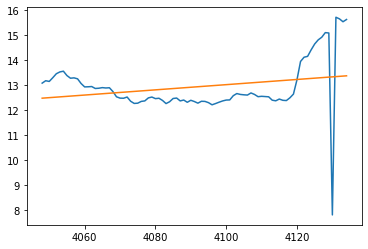

In [100]:
# Carregar os dados do arquivo Excel com ações alvo
dates = pd.read_excel('df_final_fundametos.xlsx')

# Converter a coluna 'dt_ref' para o tipo datetime
dates['dt_ref'] = pd.to_datetime(dates['dt_ref'])

# Subtrair 2 dias de cada data na coluna 'dt_ref'
dates['past_date'] = dates['dt_ref'] - timedelta(days=123)
dates = dates[['Ticker','past_date']]

df = pd.read_csv('preço_diário_histórico_basin.csv')
df.rename(columns={'Papel': 'Ticker'}, inplace=True)
df.rename(columns={'Average': 'Mean'}, inplace=True)
df.rename(columns={'Date': 'dt_ref'}, inplace=True)

df['Contagem'] = df.groupby('Ticker').cumcount() + 1

merged_df = pd.merge(df, dates, on='Ticker')
filtered_df = merged_df[merged_df['dt_ref'] >= merged_df['past_date']]


# Calcule os parâmetros lineares e a incerteza para cada grupo de Ticker
resultados = filtered_df.groupby('Ticker').apply(calcular_parametros_lineares)

# Adicione as colunas ao DataFrame
filtered_df = filtered_df.merge(resultados, left_on='Ticker', right_index=True)

teste = filtered_df[filtered_df['Ticker'] == 'BBDC4']
plt.plot(teste['Contagem'],teste['Mean'])
plt.plot(teste['Contagem'],teste['Coeficiente_Angular'].iloc[0]*teste['Contagem'] + teste['Intercepto'])

filtered_df = filtered_df[['dt_ref','Mean','Ticker','Coeficiente_Angular','Incerteza_Angular','Intercepto','Incerteza_Intercepto',
                          'Preço Justo (basin 6.0%)','Preço Justo (basin 8.0%)','Preço Justo (basin 10.0%)']]
filtered_df.to_excel(f'Angulação_123d.xlsx', index=False)

In [102]:
filtered_df

,dt_ref,Mean,Ticker,Coeficiente_Angular,Incerteza_Angular,Intercepto,Incerteza_Intercepto,Preço Justo (basin 6.0%),Preço Justo (basin 8.0%),Preço Justo (basin 10.0%)
1861,2024-04-23,10.270,AALR3,0.023979,0.006386,-34.654422,0.160372,0.383533,0.287650,0.230120
1862,2024-04-24,10.250,AALR3,0.023979,0.006386,-34.654422,0.160372,0.383533,0.287650,0.230120
1863,2024-04-25,10.050,AALR3,0.023979,0.006386,-34.654422,0.160372,0.383533,0.287650,0.230120
1864,2024-04-26,10.290,AALR3,0.023979,0.006386,-34.654422,0.160372,0.383533,0.287650,0.230120
1865,2024-04-29,10.195,AALR3,0.023979,0.006386,-34.654422,0.160372,0.290990,0.218243,0.174594
...,...,...,...,...,...,...,...,...,...,...
1925348,2024-08-19,3.455,ZAMP3,-0.001201,0.000954,5.391413,0.023960,0.168117,0.126087,0.100870
1925349,2024-08-20,3.480,ZAMP3,-0.001201,0.000954,5.391413,0.023960,0.168117,0.126087,0.100870
1925350,2024-08-21,3.455,ZAMP3,-0.001201,0.000954,5.391413,0.023960,0.168117,0.126087,0.100870
1925351,2024-08-22,3.460,ZAMP3,-0.001201,0.000954,5.391413,0.023960,0.168117,0.126087,0.100870
